In [2]:
import random
import math
import numpy as np
class individuo:
  def __init__(self,x_min,x_max,crom,tamPob):
    self.tamPob=tamPob
    self.x_min=x_min
    self.x_max=x_max
    self.crom=crom
    self.fen=0;
    self.adp=0;
    self.pi=0;
    self.qi=0;
    self.genes=[0 for i in range(0,self.crom)]

  def gIndividuo(self):
    self.genes=[random.randint(0,1) for i in range(0,self.crom)]
    self.adaptacion();

  def mostrar(self):
    print(self.genes,self.fen,self.adp,self.pi,self.qi);

  def adaptacion(self):
        self.fen=float(self.x_min+
               int(''.join(str(e) for e in self.genes),base=2)*
               ((self.x_max - self.x_min)/(2** self.crom -1)))
        self.fun4()

  def fun4(self):
    self.adp= -np.abs(self.fen*np.sin(math.sqrt(abs(self.fen))))

def numGenes(x_min,x_max,tol):
    m=math.ceil(math.log(1 + ((x_max - x_min)/tol), 2))
    return m;

def mostrarPoblacion(pob):
  for i in range(10):
    pob[i].mostrar();

def preSeleccion():
  suma=0;
  for i in range(0,len(pobInicial)):
    suma= suma+pobInicial[i].adp;
  for i in range(0, len(pobInicial)):#pi
    pobInicial[i].pi=pobInicial[i].adp/suma
  for i in range(0, len(pobInicial)):#qi
    if(i==0):
      pobInicial[i].qi=pobInicial[i].pi;
    else:
      pobInicial[i].qi=pobInicial[i].pi+pobInicial[i-1].qi

def seleccionGerarquica(tamPob):
  ordenar()
  while len(padres)!= tamPob*2:
    nR= np.random.random_sample()
    for i in range(0,len(pobInicial)):
      if pobInicial[i].qi > nR:
        padres.append(i);
        break;
      if i==len(pobInicial)-1:
        padres.append(i);
      
def cruza(crom):
  cont=0;
  for i in range(2,len(padres),2):
    rC= np.random.random_sample()
    if rC<.9:
      for m in range(2):
        rI=random.randint(0,crom);
        #print("Cruza de ppython sin(np.exp(6))adres {} y {} ".format(padres[i],padres[i+1]))
        pobHijos.append(individuo(x_min,x_max,crom,tamPob))#genera hijo
        pobHijos[cont].genes[0:rI]=pobInicial[padres[i]].genes[0:rI]#cruza padre
        pobHijos[cont].genes[rI:crom]=pobInicial[padres[i+1]].genes[rI:crom]#cruza madre
        #print("hijo : ",pobHijos[cont].genes)
        cont=cont+1;
        
def ordenar():
  pobInicial.sort(key=lambda x:x.adp)

def mutacion():
  for i in range(len(pobHijos)):
    rM=np.random.uniform();
    if(rM>.9):
      rI=random.randint(0,crom-1);
      #print("Antes de mutacion ",pobHijos[i].genes,"i: ",i,"rF",rI)
      pobHijos[i].genes[rI]=int(not(pobHijos[i].genes[rI]))
      #print("DEspues de mutacion ",pobHijos[i].genes)
    pobHijos[i].adaptacion();

def elitismo():
  pobInicial.extend(pobHijos);
  ordenar();
  while(len(pobInicial)!=tamPob): pobInicial.pop();

x_min=-250;x_max=250;tol=0.01;
tamPob=100;pobInicial= list();
crom= numGenes(x_min,x_max,tol);#retorna num de cromosomas
best= list()
pobInicial= [individuo(x_min,x_max,crom,tamPob) for i in range (0,tamPob)]
[pobInicial[i].gIndividuo() for i in range(0,tamPob)]
for i in range(10):
  padres= [];pobHijos=list()
  preSeleccion();
  seleccionGerarquica(tamPob);
  cruza(crom)
  mutacion()
  ordenar()
  elitismo()
  del pobHijos
  del padres
print("la poblacion es de {} pero solo se muestran 10".format(tamPob))
mostrarPoblacion(pobInicial)


la poblacion es de 100 pero solo se muestran 10
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] -203.00221255817502 -201.7592442881141 0.010002488156788778 0.010002488156788778
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] -203.00221255817502 -201.7592442881141 0 0
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1] -202.97932402533 -201.75444565862585 0.01000225025822411 0.020004738415012886
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1] -202.97932402533 -201.75444565862585 0 0
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] -202.88014038300145 -201.7321124611113 0 0
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] -202.88014038300145 -201.7321124611113 0 0
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] -202.88014038300145 -201.7321124611113 0 0
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] -202.88014038300145 -201.7321124611113 0 0
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] -202.88014038300145 -201.7321124611113 0 0
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] -202

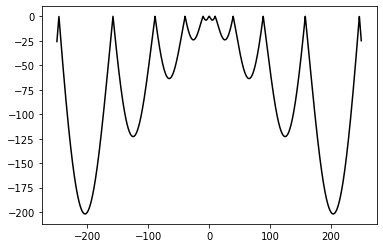

In [3]:
import matplotlib.pyplot as plt

def fun(x):
  y= -np.abs(x*np.sin(math.sqrt(abs(x))))
  return y

t1= np.arange(-250.0,250.0,0.1)
t2= [np.float(fun(i)) for i in t1]
t3 = np.asarray(t2)

plt.plot(t1,t3,'k')
plt.show()